In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 1: Generate random data for ACC features and wrist movement
num_windows = 50
window_size = 10 * 32  # 10 seconds * 32 frames/second

# Generate random ACC features (assuming 3 features)
acc_data = np.random.rand(num_windows * window_size, 3)

# Generate random wrist movement data
wrist_movement_data = np.random.choice([-1, 0, 1], size=(num_windows * window_size, 3), replace=True)

# Step 2: Generate random ratings
ratings = np.random.randint(1, 6, size=num_windows)

# Step 3: Combine ACC features, wrist movement, and ratings into a single DataFrame
acc_df = pd.DataFrame(acc_data, columns=['acc_x', 'acc_y', 'acc_z'])
wrist_movement_df = pd.DataFrame(wrist_movement_data, columns=['wrist_movement_left', 'wrist_movement_right', 'wrist_movement_straight'])
ratings_series = pd.Series(ratings, name='Rating')

# Combine all data into a single DataFrame
data = pd.concat([acc_df, wrist_movement_df, ratings_series], axis=1)

# Step 4: Split the data into training and testing sets
X = data.drop('Rating', axis=1)
y = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train a regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 6: Evaluate the model's performance
y_pred_train = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
print("Train RMSE:", train_rmse)

y_pred_test = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Test RMSE:", test_rmse)

# Step 7: Predict ratings for new data
# Generate new random ACC and wrist movement data
new_acc_data = np.random.rand(10 * 32, 3)  # 10 seconds of data
new_wrist_movement_data = np.random.choice([-1, 0, 1], size=(10 * 32, 3), replace=True)

# Combine new data into a DataFrame
new_data = pd.DataFrame(np.concatenate([new_acc_data, new_wrist_movement_data], axis=1),
                        columns=['acc_x', 'acc_y', 'acc_z', 'wrist_movement_left', 'wrist_movement_right', 'wrist_movement_straight'])

# Predict ratings for new data
predicted_ratings = model.predict(new_data)

print("Predicted ratings for new data:", predicted_ratings)


Pearson correlation coefficient: 1.1672683752585893e-17
Pearson p-value: 1.0
Spearman correlation coefficient: 0.0
Spearman p-value: 1.0


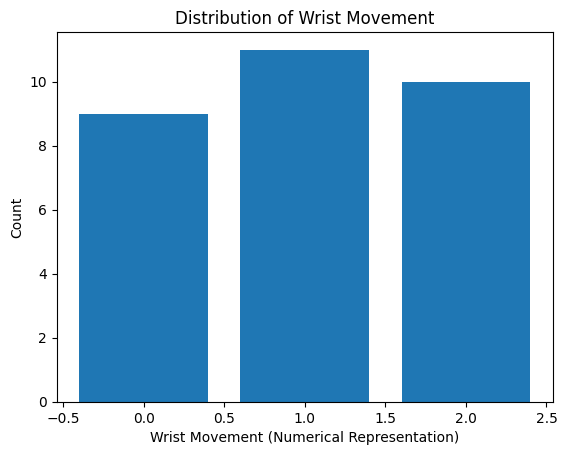

In [2]:
import numpy as np
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt

# Example data (replace it with your actual data)
wrist_movement_data = [[1, 2, 0, 2, 1, 0, 1, 2, 0, 2],  # Wrist movements for each second
                       [2, 0, 1, 1, 2, 0, 1, 0, 2, 1], 
                       [0, 1, 2, 1, 0, 2, 1, 2, 0, 1]]  
driver_ratings_data = [4, 3, 5]  # Driver ratings for each 10-second interval

# Flatten the lists to get one long list for wrist movements
flat_wrist_movement_data = np.ravel(wrist_movement_data)

# Step 3: Correlation Calculation
# Pearson correlation coefficient
pearson_corr, pearson_p_value = pearsonr(flat_wrist_movement_data, np.repeat(driver_ratings_data, 10))
print("Pearson correlation coefficient:", pearson_corr)
print("Pearson p-value:", pearson_p_value)

# Spearman correlation coefficient
spearman_corr, spearman_p_value = spearmanr(flat_wrist_movement_data, np.repeat(driver_ratings_data, 10))
print("Spearman correlation coefficient:", spearman_corr)
print("Spearman p-value:", spearman_p_value)

# Step 6: Visualization
# We will not be able to visualize this data directly as it's not clear how to represent each second.
# However, we can visualize the distribution of wrist movements across all seconds.

# Count occurrences of each wrist movement category
unique_movements, movement_counts = np.unique(flat_wrist_movement_data, return_counts=True)

# Plot bar chart
plt.bar(unique_movements, movement_counts)
plt.xlabel('Wrist Movement (Numerical Representation)')
plt.ylabel('Count')
plt.title('Distribution of Wrist Movement')
plt.show()
